# In this notebook we're going to see :

-Linear Regression 

-Exploratory Data Analysis 

-Preprocessing

-Modeling

-Hyperparameter tunning 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
df_boston = pd.DataFrame(data = boston.data , columns = boston.feature_names)

In [8]:
df_boston['PRICE'] = boston.target

In [9]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Exploratory Data Analysis  (EDA)

In [10]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
len(df_boston['CHAS'].unique())

2

In [12]:
for feature in df_boston.columns:
    print('{} has {} unique features'.format(feature,len(df_boston[feature].unique())))

CRIM has 504 unique features
ZN has 26 unique features
INDUS has 76 unique features
CHAS has 2 unique features
NOX has 81 unique features
RM has 446 unique features
AGE has 356 unique features
DIS has 412 unique features
RAD has 9 unique features
TAX has 66 unique features
PTRATIO has 46 unique features
B has 357 unique features
LSTAT has 455 unique features
PRICE has 229 unique features


In [13]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


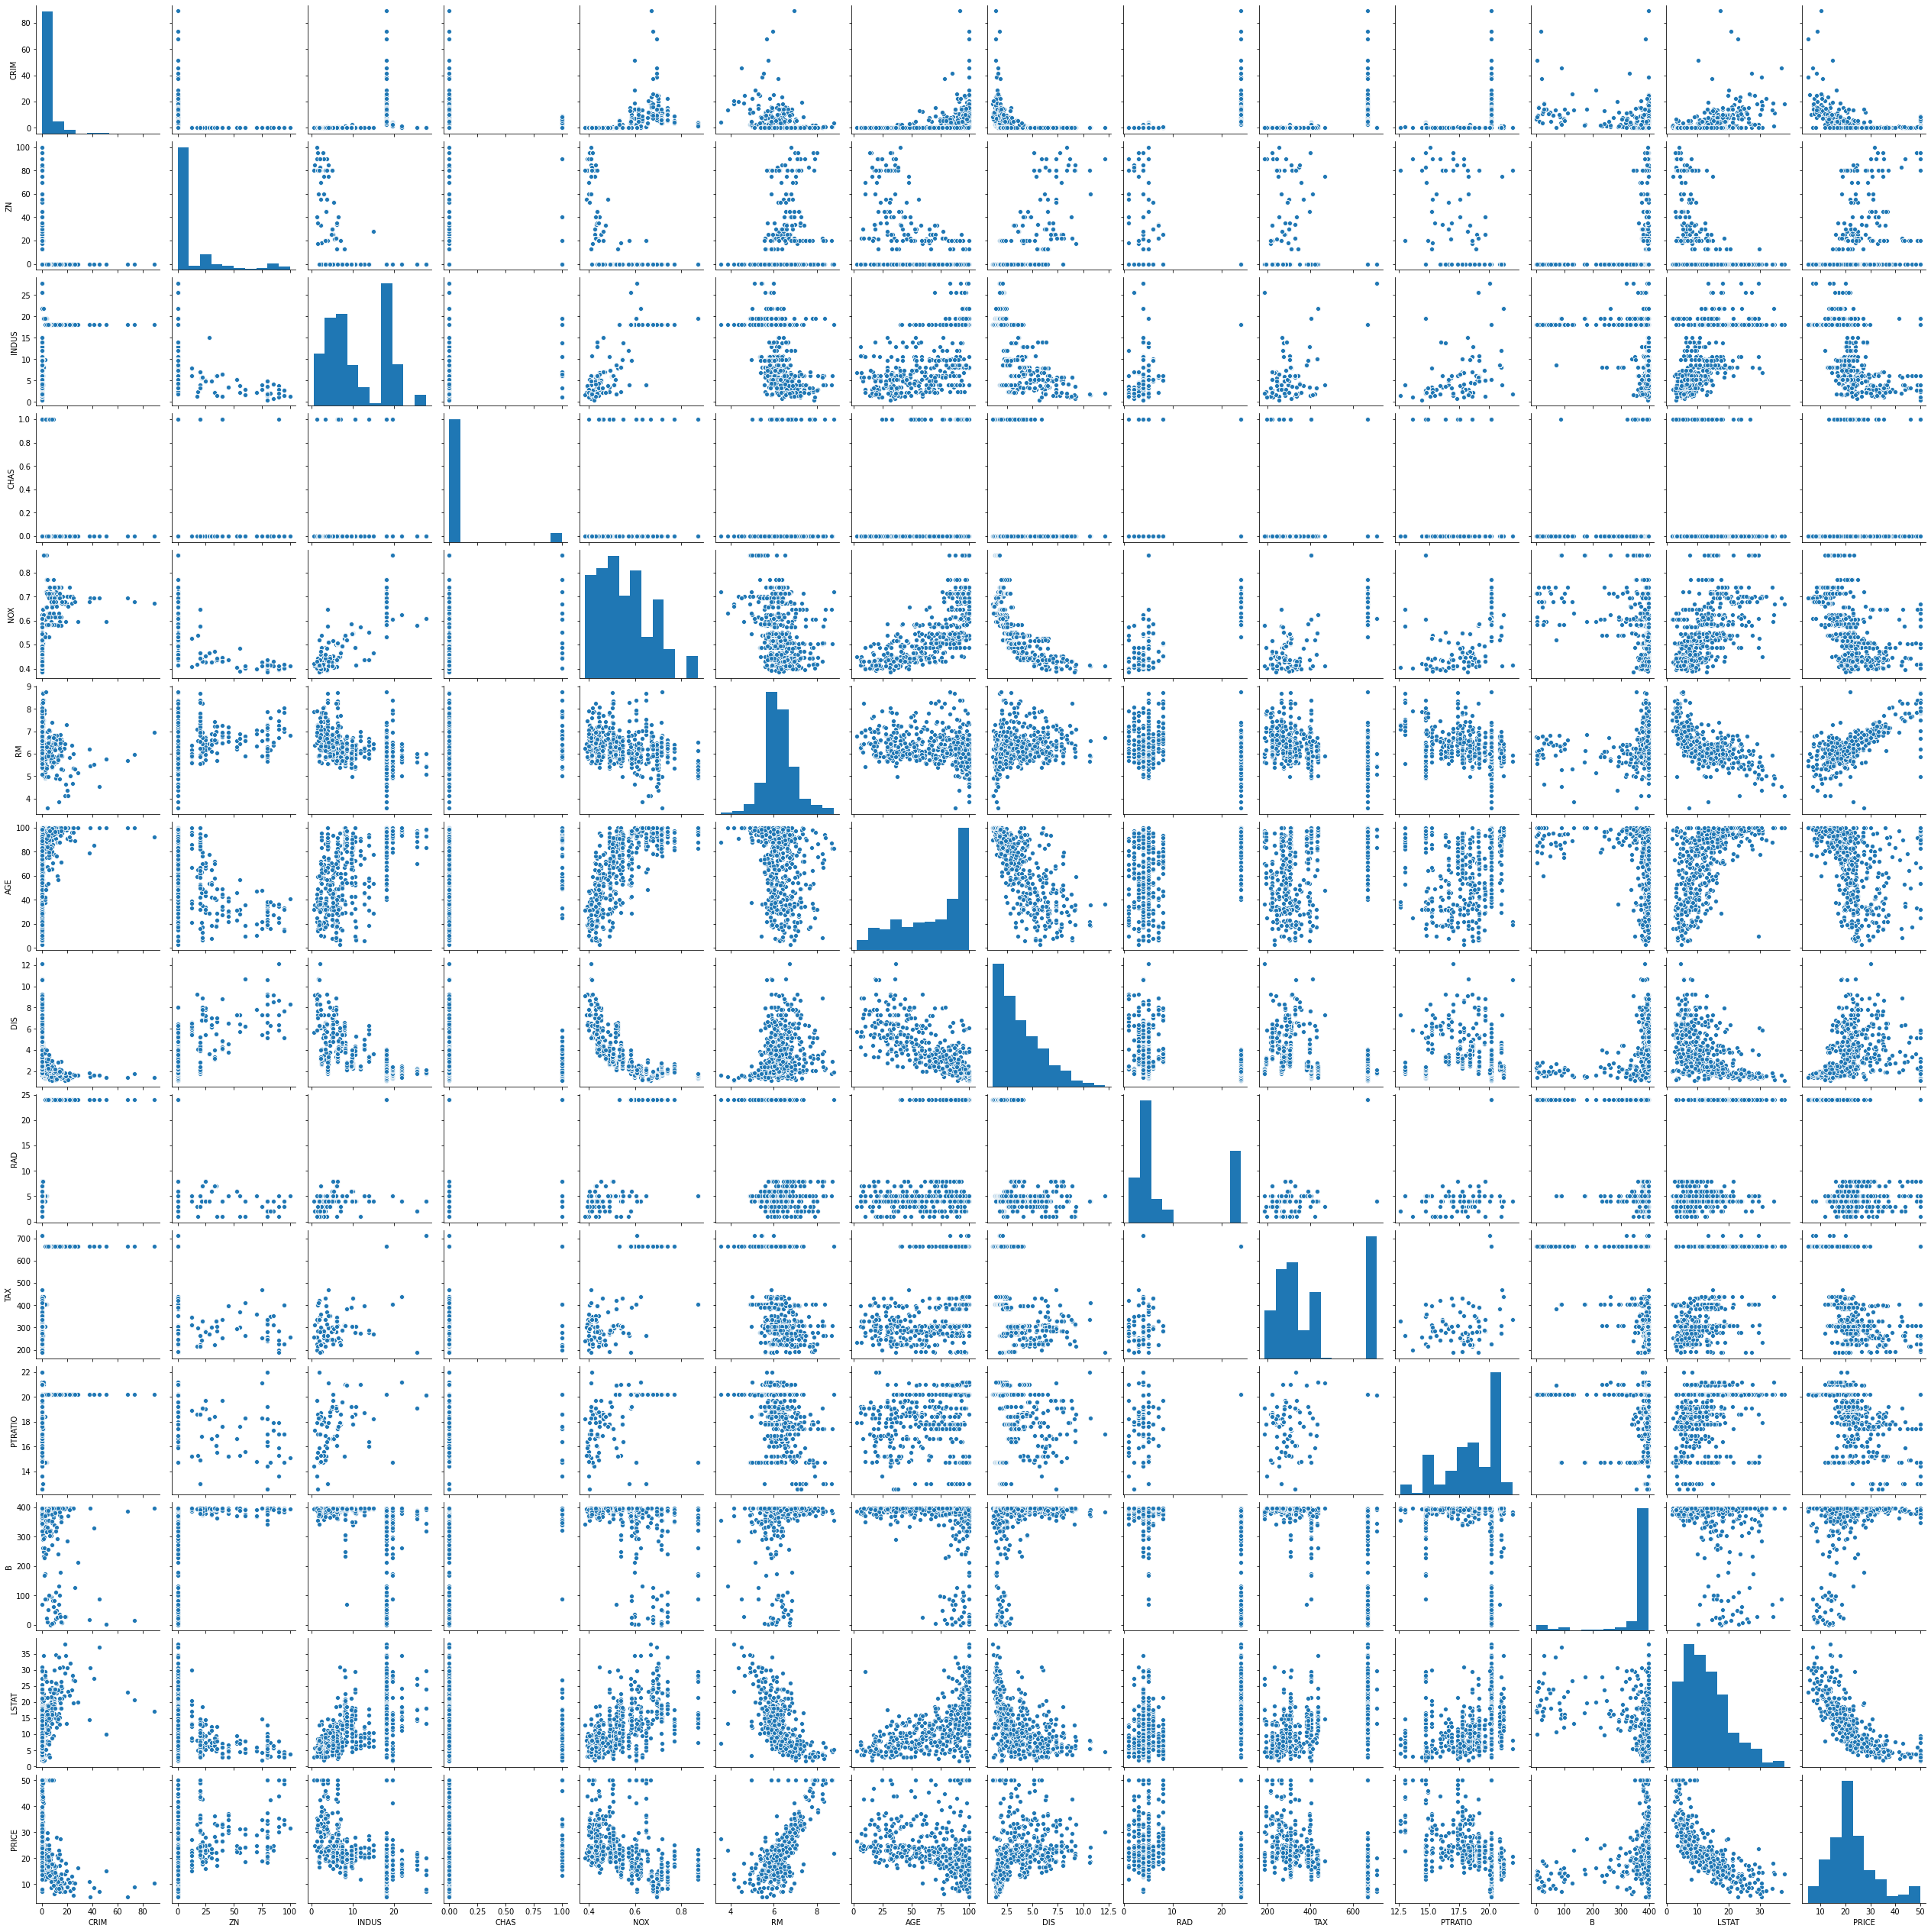

In [14]:
sns.pairplot(df_boston)

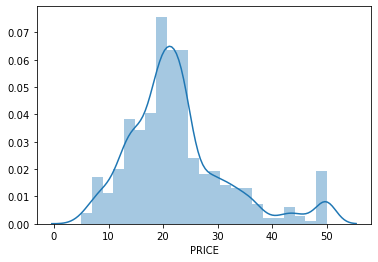

In [15]:
sns.distplot(df_boston['PRICE'])

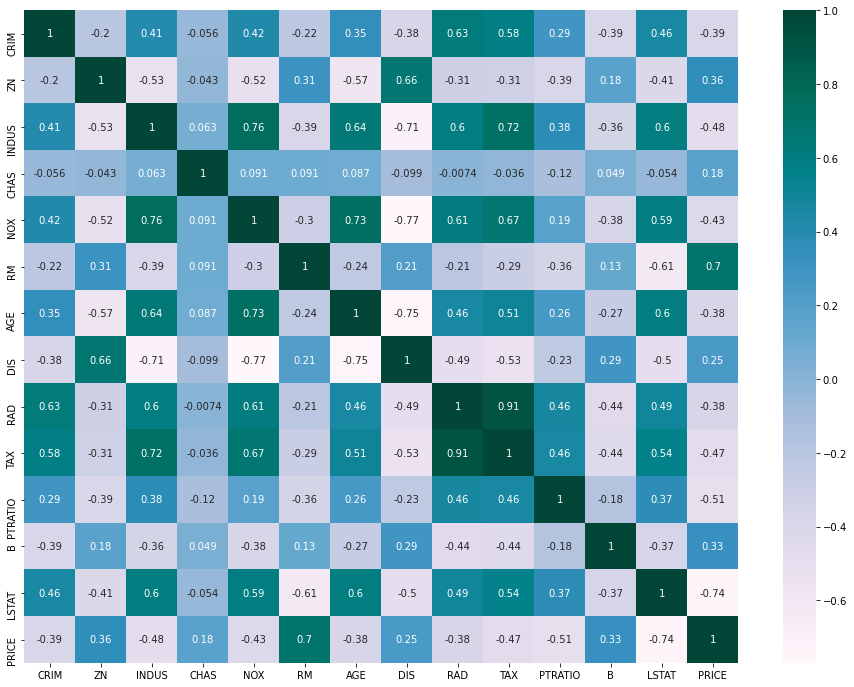

In [16]:
plt.figure(figsize = (16,12))
sns.heatmap(df_boston.corr(), annot = True, cmap = 'PuBuGn')

# Spliting into training and test features (X_train, x_train) and  labels(y_train,y_test)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_boston.drop('PRICE', axis = 1)

In [19]:
y = df_boston['PRICE']

In [20]:
np.random.seed(41)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [22]:
models = 'RandomForestRegressor LinearRegression Lasso ElasticNet DecisionTreeRegressor KNeighborsRegressor'.split()
linear_model= LinearRegression()

## training and testing - 1

just trying to see how the models without preprocessing and hyperparameter tunning
some models might get misleading results because the we didn't preprocessed the features

In [23]:
for model in models:
    #exec('print(\'%s\')' %(model))
    exec('%s_model = %s()'%(model, model))
    exec('%s_model.fit(X_train,y_train)' %(model))
    exec('print(\'%s score : {:.4}\'.format( %s_model.score(X_test,y_test)) )' %(model, model))
    #exec('' %(model))

RandomForestRegressor score : 0.6094
LinearRegression score : 0.5058
Lasso score : 0.4633
ElasticNet score : 0.4724
DecisionTreeRegressor score : -0.001798
KNeighborsRegressor score : 0.2508


## Preprocessing - 1

encoding categorical features, without scaling

In [24]:
for element in df_boston.columns:
    print('{} has {} unique values'.format(element, len(df_boston[element].unique())))

CRIM has 504 unique values
ZN has 26 unique values
INDUS has 76 unique values
CHAS has 2 unique values
NOX has 81 unique values
RM has 446 unique values
AGE has 356 unique values
DIS has 412 unique values
RAD has 9 unique values
TAX has 66 unique values
PTRATIO has 46 unique values
B has 357 unique values
LSTAT has 455 unique values
PRICE has 229 unique values


In [25]:
def feature_exploration(name):
    """
    Print value_counts()
    plot Scatterplot(feature vs target)
    plot distplot()
    """
    print('{} feature exploration'.format(name))
    print('Value - Counts')
    print(df_boston[name].value_counts())
    sns.distplot(df_boston[name])
    plt.show()
    sns.scatterplot(df_boston[name],df_boston['PRICE'])    

ZN feature exploration
Value - Counts
0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64


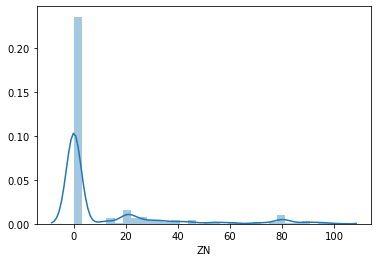

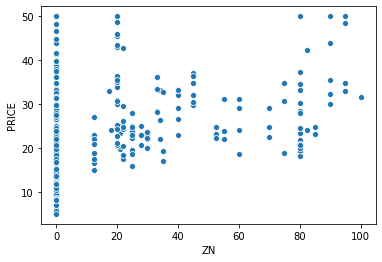

In [26]:
feature_exploration('ZN')

CHAS feature exploration
Value - Counts
0.0    471
1.0     35
Name: CHAS, dtype: int64


c:\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


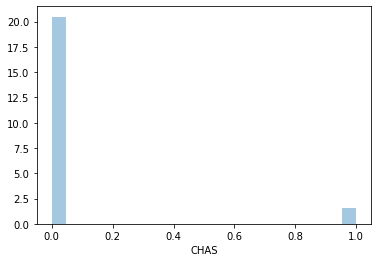

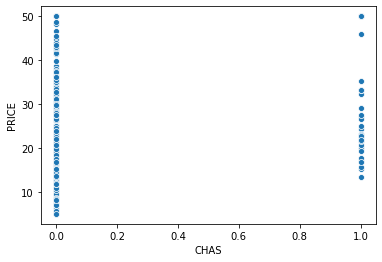

In [27]:
feature_exploration('CHAS')

RAD feature exploration
Value - Counts
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


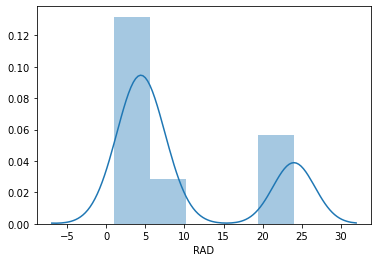

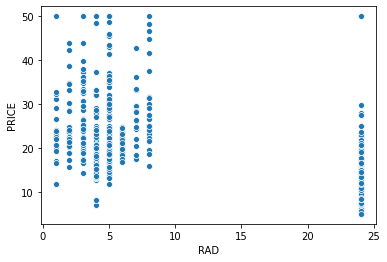

In [28]:
feature_exploration('RAD')

In [29]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [30]:
cat_columns = [df_boston.columns[1],df_boston.columns[3], df_boston.columns[8]]
df_boston_encoded = pd.get_dummies(df_boston, columns = cat_columns)

In [31]:
df_boston_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   INDUS     506 non-null    float64
 2   NOX       506 non-null    float64
 3   RM        506 non-null    float64
 4   AGE       506 non-null    float64
 5   DIS       506 non-null    float64
 6   TAX       506 non-null    float64
 7   PTRATIO   506 non-null    float64
 8   B         506 non-null    float64
 9   LSTAT     506 non-null    float64
 10  PRICE     506 non-null    float64
 11  ZN_0.0    506 non-null    uint8  
 12  ZN_12.5   506 non-null    uint8  
 13  ZN_17.5   506 non-null    uint8  
 14  ZN_18.0   506 non-null    uint8  
 15  ZN_20.0   506 non-null    uint8  
 16  ZN_21.0   506 non-null    uint8  
 17  ZN_22.0   506 non-null    uint8  
 18  ZN_25.0   506 non-null    uint8  
 19  ZN_28.0   506 non-null    uint8  
 20  ZN_30.0   506 non-null    uint8 

## Modeling  - 2

Let's fit the models into the encoded data and verify the results

In [32]:
np.random.seed = 41
X= df_boston_encoded
y = df_boston['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [33]:
for model in models:
    
    #creating model object
    exec('%s_model = %s()'%(model, model))
    #fiting the model
    exec('%s_model.fit(X_train,y_train)' %(model))
    #printing score
    exec('print(\'%s score : {:.4}\'.format( %s_model.score(X_test,y_test)) )' %(model, model))
    

RandomForestRegressor score : 0.9992
LinearRegression score : 1.0
Lasso score : 0.9998
ElasticNet score : 0.9998
DecisionTreeRegressor score : 0.9982
KNeighborsRegressor score : 0.772


the models have nice scores, but they could be overfitted

In [34]:
from sklearn import metrics

#### Predictions

In [35]:
for model in models:
    #predicting
    exec('%s_preds = %s_model.predict(X_test)' %(model,model)) 

##### printing scatterplot between y_test and predictions

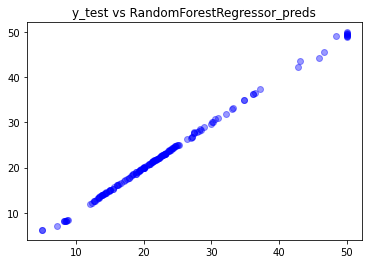

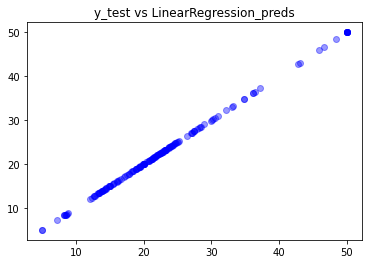

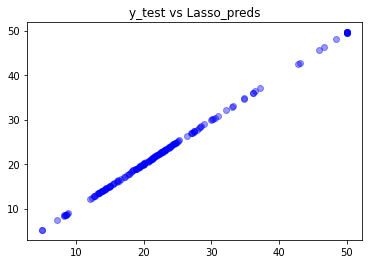

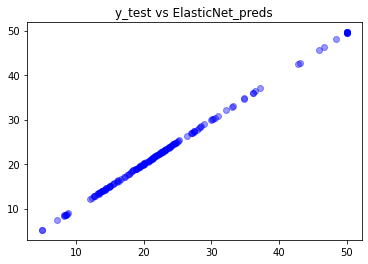

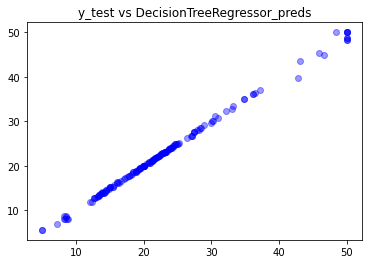

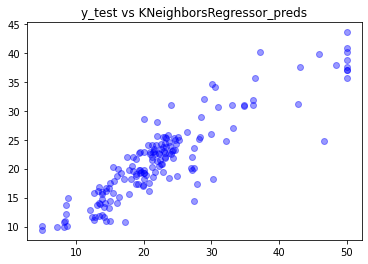

In [36]:
for model in models:
    exec('plt.scatter(y_test,%s_preds, c = \'b\', alpha = 0.4)' %(model))
    exec('plt.title(\'y_test vs %s_preds\')' %(model))
    plt.show()

##### verifying Cross validation scores
Trying to see if the model are overfitted

In [37]:
from sklearn.model_selection import cross_val_score


In [38]:
scores = cross_val_score(RandomForestRegressor_model, X, y, cv=5)
np.array(scores).mean()

0.9991562112157422

In [39]:
for model in models:
    exec('%s_cv_scores = cross_val_score(%s_model, X,y, cv = 5)' %(model,model))
    exec('print(\'%s cv model score : \')' %(model))
    exec('print(np.array(%s_cv_scores).mean())' %(model))

RandomForestRegressor cv model score : 
0.9991400027183588
LinearRegression cv model score : 
1.0
Lasso cv model score : 
0.9997169727466886
ElasticNet cv model score : 
0.9997067088280358
DecisionTreeRegressor cv model score : 
0.9975263441810206
KNeighborsRegressor cv model score : 
0.25059818994556604


###### ps: the models are overfitted by the way the preprocessing in this model was set up, some features we're continous but we're transformed into categorical, if a new point we're tested with different values into the models they would not be able to handle

## Another approach
let's work with features with > |0.4| correlation between feature and the target,
preprocessing with scaling and tune the hyperparameters with 

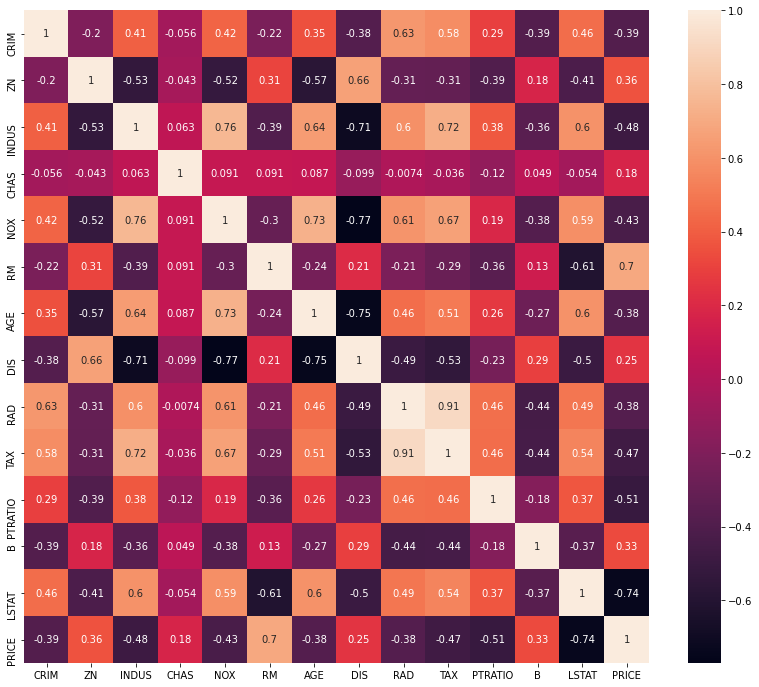

In [40]:
plt.figure(figsize = (14,12))
sns.heatmap(df_boston.corr(), annot=True)

In [41]:
df_corr = df_boston.corr()

In [42]:
df_corr[df_corr['PRICE'] >= 0.4]['PRICE']

RM       0.69536
PRICE    1.00000
Name: PRICE, dtype: float64

In [43]:
df_corr[df_corr['PRICE'] <= -0.4]['PRICE']

INDUS     -0.483725
NOX       -0.427321
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

### Spliting into training and test features (X_train, x_train) and  labels(y_train,y_test)

In [55]:
X = df_boston_encoded.drop('PRICE',axis = 1)
y = df_boston_encoded['PRICE']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [57]:
def rmsle(y_test, y_preds):
    """Root mean square log error"""
    return np.sqrt(metrics.mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_test)
    scores = {'Test Model Score R^2': model.score(X_test, y_test),
              "Test MAE": metrics.mean_absolute_error(y_test, train_preds),
              "Test RMSLE (pct error)": rmsle(y_test, train_preds)}
    return scores

In [58]:
forest_model = RandomForestRegressor(n_jobs=-1)
forest_model.fit(X_train,y_train)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [59]:
show_scores(forest_model)

{'Test Model Score R^2': 0.6066493488485207,
 'Test MAE': 2.610764705882354,
 'Test RMSLE (pct error)': 0.19394345336656774}

In [60]:
linear_model.score(X_test,y_test)

0.5075630788348275

In [61]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

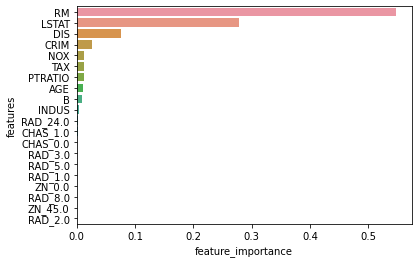

In [62]:
plot_features(X_train.columns, forest_model.feature_importances_)

### Hyperparameter tuning with RandomizedSearchCV

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

In [64]:
%%time
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 5 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [65]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 10}

In [66]:
show_scores(rs_model)

{'Test Model Score R^2': 0.6458796807694765,
 'Test MAE': 2.530192669141778,
 'Test RMSLE (pct error)': 0.18985785636959476}

### Changing approach

#### Let's use features that have high correlation with the price

In [67]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [68]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target

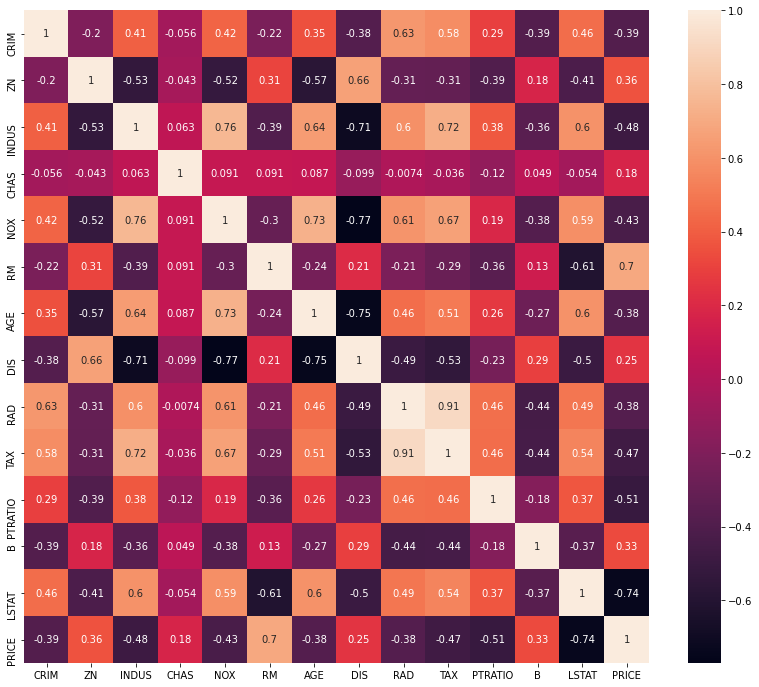

In [69]:
plt.figure(figsize = (14,12))
sns.heatmap(df_boston.corr(), annot=True)

In [70]:
df_corr[df_corr['PRICE']>= 0.4]['PRICE']

RM       0.69536
PRICE    1.00000
Name: PRICE, dtype: float64

In [71]:
df_corr[df_corr['PRICE']<= -0.4]['PRICE']

INDUS     -0.483725
NOX       -0.427321
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

### using more parameters

In [72]:
X = df_boston[['RM','INDUS','NOX','TAX', 'PTRATIO', 'LSTAT']]
y = df_boston['PRICE']

In [73]:
np.random.seed = 41
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Standard Features

The differing scales of the raw data may impact these algorithms. Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. I implement standardisation using pipelines. I then use cross-validation to validate performance of algorithms in totality.

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [75]:
for model in models:
    print(model)

RandomForestRegressor
LinearRegression
Lasso
ElasticNet
DecisionTreeRegressor
KNeighborsRegressor


In [76]:
pipelines = []
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('RFR',RandomForestRegressor())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledD', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [77]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10,shuffle = True, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: mean: %f, std: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledRFR: mean: 0.829516, std: 0.103182
ScaledLR: mean: 0.666250, std: 0.142549
ScaledLASSO: mean: 0.664276, std: 0.108530
ScaledEN: mean: 0.637355, std: 0.110460
ScaledD: mean: 0.722060, std: 0.283284
ScaledKNN: mean: 0.831650, std: 0.078346


the score of all models increased and the KNN that had the worst results at the begin now have the second best score 

In [97]:
model = Pipeline([('Scaler', StandardScaler()),('RFR',RandomForestRegressor())])
kfold = KFold(n_splits=10,shuffle = True, random_state=21)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold)

In [99]:
cv_results

array([0.82789717, 0.87652685, 0.8648135 , 0.66886221, 0.91829516,
       0.65468896, 0.92536504, 0.85570485, 0.9497346 , 0.78664907])

In [102]:
cross_val_score()

KFold(n_splits=10, random_state=21, shuffle=True)

In [ ]:
KFold()

In [79]:
model

Pipeline(steps=[('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])

### Hyperparameter tunning

In [80]:
#X
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [81]:
model = RandomForestRegressor()
model.fit(rescaled_X_train,y_train)

RandomForestRegressor()

In [82]:
model.score(rescaled_X_test,y_test)

0.8113459808853084

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
kfold = KFold(n_splits=10,shuffle = True, random_state=21)

rf_grid = {"n_estimators": np.arange(1, 100, 1),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(1, 25, 1),
           "min_samples_leaf": np.arange(1, 25, 1),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=kfold,
                              n_jobs = -1,
                              verbose=True)

In [112]:
%%time
rs_model.fit(rescaled_X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    2.1s


Wall time: 2.49 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=21, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,...,
       18, 19, 20, 21, 22, 23, 24]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 

In [113]:
rs_model.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=15)

In [114]:
rs_model.score(rescaled_X_test,y_test)

0.8210633428213954

In [115]:
forest_best_02 = RandomForestRegressor(n_estimators=15,
                                   min_samples_split=4,
                                   min_samples_leaf=4,
                                   max_depth=10,
                                   n_jobs = -1)
forest_best_02.fit(rescaled_X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=15, n_jobs=-1)

In [116]:
forest_best_02.score(rescaled_X_test, y_test)

0.8004313049857574

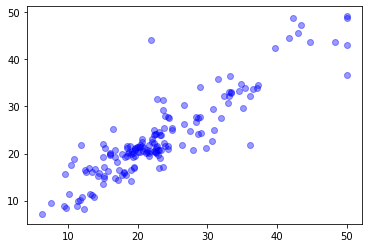

In [117]:
predictions_forest_02 = forest_best_02.predict(rescaled_X_test)

plt.scatter(y_test,predictions_forest_02, c = 'b', alpha= 0.4)

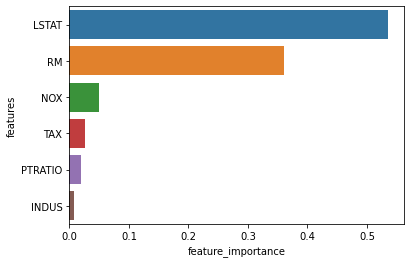

In [119]:
plot_features(X_train.columns, forest_best_02.feature_importances_)

###### Next steps, try an optimizer for CV and hyperparameter tunning